In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import pandas_profiling as pp
from patsy import dmatrices


pd.set_option('display.max_columns', 500)

In [2]:
score_Data = pd.read_csv('./data/spreadspoke_scores.csv')

In [3]:
data_filtered = score_Data[score_Data.schedule_season>=2011]

In [4]:
pp.ProfileReport(data_filtered)

Number of variables,18
Number of observations,2136
Total Missing (%),8.1%
Total size in memory,271.2 KiB
Average record size in memory,130.0 B
Numeric,6
Categorical,9
Boolean,2
Date,0
Text (Unique),0
Rejected,1


In [5]:
data_filtered.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
10275,09/08/2011,2011,1,False,Green Bay Packers,42,34,New Orleans Saints,GB,-5.0,48,Lambeau Field,False,68.0,5.0,67,NaN
10276,09/11/2011,2011,1,False,Arizona Cardinals,28,21,Carolina Panthers,ARI,-7.0,37.5,University of Phoenix Stadium,False,72.0,0.0,NaN,DOME
10277,09/11/2011,2011,1,False,Baltimore Ravens,35,7,Pittsburgh Steelers,BAL,-1.5,37,M&T Bank Stadium,False,75.0,2.0,71,Rain
10278,09/11/2011,2011,1,False,Chicago Bears,30,12,Atlanta Falcons,ATL,-1.5,41,Soldier Field,False,78.0,7.0,57,NaN
10279,09/11/2011,2011,1,False,Cleveland Browns,17,27,Cincinnati Bengals,CLE,-7.0,36.5,FirstEnergy Stadium,False,72.0,9.0,NaN,NaN


In [6]:
data_filtered.columns

Index(['schedule_date', 'schedule_season', 'schedule_week', 'schedule_playoff',
       'team_home', 'score_home', 'score_away', 'team_away',
       'team_favorite_id', 'spread_favorite', 'over_under_line', 'stadium',
       'stadium_neutral', 'weather_temperature', 'weather_wind_mph',
       'weather_humidity', 'weather_detail'],
      dtype='object')

In [7]:
nfl_teams = pd.read_csv('data/nfl_teams.csv')
nfl_teams.head()

,team_name,team_name_short,team_id,team_id_pfr,team_conference,team_division,team_conference_pre2002,team_division_pre2002
0,Arizona Cardinals,Cardinals,ARI,CRD,NFC,NFC West,NFC,NFC West
1,Phoenix Cardinals,Cardinals,ARI,CRD,NFC,NaN,NFC,NFC East
2,St. Louis Cardinals,Cardinals,ARI,ARI,NFC,NaN,NFC,NFC East
3,Atlanta Falcons,Falcons,ATL,ATL,NFC,NFC South,NFC,NFC West
4,Baltimore Ravens,Ravens,BAL,RAV,AFC,AFC North,AFC,AFC Central


In [8]:
id_dict = nfl_teams.set_index('team_name')['team_id'].to_dict()

In [9]:
def over_under_result(x):
    if x['total_score'] > x['over_under_line']:
        return 'over'
    elif x['total_score'] == x['over_under_line']:
        return 'push'
    else:
        return 'under'

In [10]:
def calc_spread(x):
    if x.team_favorite_id == 'PICK':
        return x.score_home - x.score_away
    elif x.team_favorite_id == x.team_home_id:
        return x.score_away - x.score_home
    else:
        return x.score_home - x.score_away

In [11]:
def spread_result(x):
    if x.team_favorite_id == 'PICK':
        if x['actual_spread'] > x['spread_favorite']:
            return 'home'
        elif x['actual_spread'] == x['spread_favorite']:
            return 'push'
        else:
            return 'away'
    else:
        if x['actual_spread'] > x['spread_favorite']:
            return 'underdog'
        elif x['actual_spread'] == x['spread_favorite']:
            return 'push'
        else:
            return 'favorite'

In [12]:
def underdog_id(x):
    if x['team_favorite_id']=='PICK':
        return 'PICK'
    elif x['team_home_id']==x['team_favorite_id']:
        return x['team_away_id']
    else:
        return x['team_home_id']

In [13]:
def game_winner(x):
    if x['score_home']>x['score_away']:
        return x['team_home_id']
    elif x['score_home']<x['score_away']:
        return x['team_away_id']
    else:
        return 'TIE'

In [14]:

data_filtered['schedule_date'] = pd.to_datetime(data_filtered['schedule_date'], format='%m/%d/%Y')

data_filtered['over_under_line'] = data_filtered['over_under_line'].astype(
    'float')
                                                        
data_filtered.loc[:, 'team_home_id'] = data_filtered.loc[:, 'team_home'].map(
    lambda x: id_dict[x])
data_filtered.loc[:, 'team_away_id'] = data_filtered.loc[:, 'team_away'].map(
    lambda x: id_dict[x])

data_filtered.loc[:, 'team_underdog_id'] = data_filtered.apply(underdog_id, axis=1)

data_filtered['total_score'] = data_filtered['score_home'] + \
    data_filtered['score_away']

data_filtered['over_under_result'] = data_filtered.apply(over_under_result, axis=1)

data_filtered['actual_spread'] = data_filtered.apply(calc_spread, axis=1)

data_filtered['spread_result'] = data_filtered.apply(spread_result, axis=1)

data_filtered['game_winner_id'] = data_filtered.apply(game_winner, axis=1)

data_filtered.head()

/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,team_home_id,team_away_id,team_underdog_id,total_score,over_under_result,actual_spread,spread_result,game_winner_id
10275,2011-09-08,2011,1,False,Green Bay Packers,42,34,New Orleans Saints,GB,-5.0,48.0,Lambeau Field,False,68.0,5.0,67,NaN,GB,NO,NO,76,over,-8,favorite,GB
10276,2011-09-11,2011,1,False,Arizona Cardinals,28,21,Carolina Panthers,ARI,-7.0,37.5,University of Phoenix Stadium,False,72.0,0.0,NaN,DOME,ARI,CAR,CAR,49,over,-7,push,ARI
10277,2011-09-11,2011,1,False,Baltimore Ravens,35,7,Pittsburgh Steelers,BAL,-1.5,37.0,M&T Bank Stadium,False,75.0,2.0,71,Rain,BAL,PIT,PIT,42,over,-28,favorite,BAL
10278,2011-09-11,2011,1,False,Chicago Bears,30,12,Atlanta Falcons,ATL,-1.5,41.0,Soldier Field,False,78.0,7.0,57,NaN,CHI,ATL,CHI,42,over,18,underdog,CHI
10279,2011-09-11,2011,1,False,Cleveland Browns,17,27,Cincinnati Bengals,CLE,-7.0,36.5,FirstEnergy Stadium,False,72.0,9.0,NaN,NaN,CLE,CIN,CIN,44,over,10,underdog,CIN


In [15]:
data_filtered.spread_result.value_counts(1)

underdog    0.497659
favorite    0.465824
push        0.031367
away        0.002809
home        0.002341
Name: spread_result, dtype: float64

In [16]:
print(data_filtered.spread_result.value_counts(1))
print('\n')
print(data_filtered.over_under_result.value_counts(1))

underdog    0.497659
favorite    0.465824
push        0.031367
away        0.002809
home        0.002341
Name: spread_result, dtype: float64


under    0.505150
over     0.479401
push     0.015449
Name: over_under_result, dtype: float64


In [17]:
print(list(data_filtered.columns))

['schedule_date', 'schedule_season', 'schedule_week', 'schedule_playoff', 'team_home', 'score_home', 'score_away', 'team_away', 'team_favorite_id', 'spread_favorite', 'over_under_line', 'stadium', 'stadium_neutral', 'weather_temperature', 'weather_wind_mph', 'weather_humidity', 'weather_detail', 'team_home_id', 'team_away_id', 'team_underdog_id', 'total_score', 'over_under_result', 'actual_spread', 'spread_result', 'game_winner_id']


In [18]:
predictive_features = ['schedule_date', 'schedule_season', 'schedule_week', 
                       'schedule_playoff','team_home_id', 'team_away_id', 
                       'team_favorite_id', 'spread_favorite', 'over_under_line',
                       'stadium', 'stadium_neutral', 'weather_temperature', 
                       'weather_wind_mph', 'weather_humidity', 'weather_detail', 'team_underdog_id']

In [19]:
X = data_filtered[predictive_features]

In [20]:
X.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home_id,team_away_id,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,team_underdog_id
10275,2011-09-08,2011,1,False,GB,NO,GB,-5.0,48.0,Lambeau Field,False,68.0,5.0,67,NaN,NO
10276,2011-09-11,2011,1,False,ARI,CAR,ARI,-7.0,37.5,University of Phoenix Stadium,False,72.0,0.0,NaN,DOME,CAR
10277,2011-09-11,2011,1,False,BAL,PIT,BAL,-1.5,37.0,M&T Bank Stadium,False,75.0,2.0,71,Rain,PIT
10278,2011-09-11,2011,1,False,CHI,ATL,ATL,-1.5,41.0,Soldier Field,False,78.0,7.0,57,NaN,CHI
10279,2011-09-11,2011,1,False,CLE,CIN,CLE,-7.0,36.5,FirstEnergy Stadium,False,72.0,9.0,NaN,NaN,CIN


In [21]:
X.dtypes

schedule_date          datetime64[ns]
schedule_season                 int64
schedule_week                  object
schedule_playoff                 bool
team_home_id                   object
team_away_id                   object
team_favorite_id               object
spread_favorite               float64
over_under_line               float64
stadium                        object
stadium_neutral                  bool
weather_temperature           float64
weather_wind_mph              float64
weather_humidity               object
weather_detail                 object
team_underdog_id               object
dtype: object

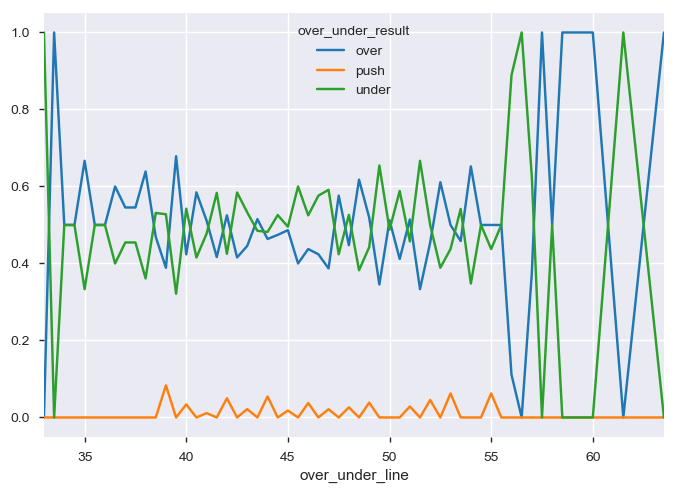

In [22]:
ct = pd.crosstab(data_filtered.over_under_line, data_filtered.over_under_result) #.plot();
ct.div(np.sum(ct, axis=1), axis=0).plot();

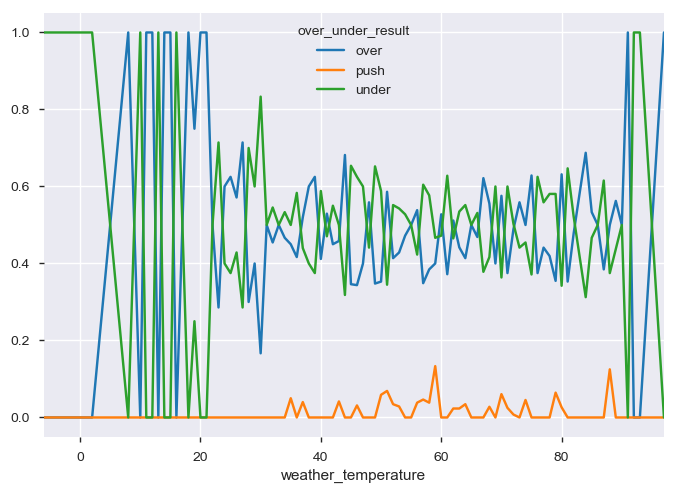

In [23]:
ct = pd.crosstab(data_filtered.weather_temperature, data_filtered.over_under_result) #.plot();
ct.div(np.sum(ct, axis=1), axis=0).plot();

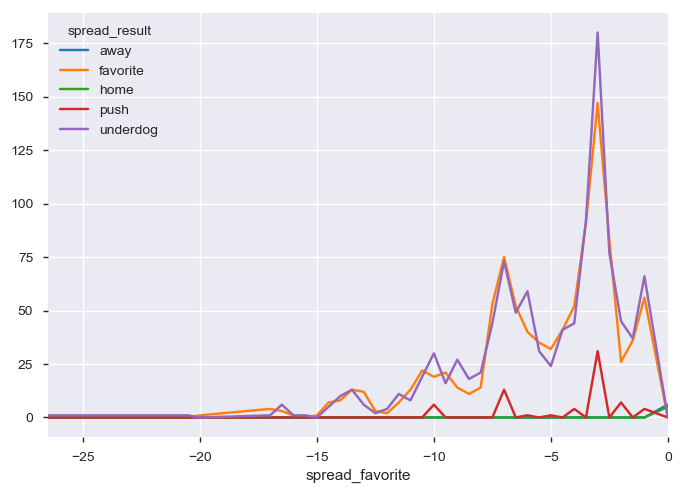

In [24]:
pd.crosstab(data_filtered.spread_favorite, data_filtered.spread_result).plot();

In [25]:
import plotly.offline as pl


In [26]:
import cufflinks as cf
cf.go_offline()

In [27]:
pd.crosstab(data_filtered.spread_result, data_filtered.team_favorite_id).iplot()

In [28]:
ct = pd.crosstab(data_filtered.spread_result, data_filtered.team_favorite_id)
ct.T.div(ct.sum(), axis=0).iplot(title='Spread Result by Favorite Team')

In [29]:
ct = pd.crosstab(data_filtered.spread_result, data_filtered.team_underdog_id)
ct.T.div(ct.sum(), axis=0).iplot(title='Spread Result by Underdog Team')

In [30]:
data_filtered[data_filtered.team_favorite_id=="PICK"].head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,team_home_id,team_away_id,team_underdog_id,total_score,over_under_result,actual_spread,spread_result,game_winner_id
10632,2012-10-15,2012,6,False,San Diego Chargers,24,35,Denver Broncos,PICK,0.0,47.5,Qualcomm Stadium,False,78.0,7.0,50,NaN,LAC,DEN,PICK,59,over,-11,away,DEN
10752,2012-12-16,2012,15,False,Atlanta Falcons,34,0,New York Giants,PICK,0.0,50.0,Georgia Dome,False,72.0,0.0,NaN,DOME,ATL,NYG,PICK,34,under,34,home,ATL
10900,2013-10-14,2013,6,False,San Diego Chargers,19,9,Indianapolis Colts,PICK,0.0,50.5,Qualcomm Stadium,False,69.0,3.0,69,NaN,LAC,IND,PICK,28,under,10,home,LAC
10940,2013-11-03,2013,9,False,Washington Redskins,30,24,San Diego Chargers,PICK,0.0,48.5,FedEx Field,False,57.0,20.0,41,NaN,WAS,LAC,PICK,54,over,6,home,WAS
11380,2015-09-27,2015,3,False,Dallas Cowboys,28,39,Atlanta Falcons,PICK,0.0,43.5,Cowboys Stadium,False,72.0,0.0,NaN,DOME,DAL,ATL,PICK,67,over,-11,away,ATL


In [31]:
giantsgames = (data_filtered.team_away_id=='NYG') | (data_filtered.team_home_id=='NYG')
#season = data_filtered.schedule_season == 2018
weather = data_filtered.weather_detail=='Rain'

data_filtered[giantsgames & weather]

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,team_home_id,team_away_id,team_underdog_id,total_score,over_under_result,actual_spread,spread_result,game_winner_id
10527,2012-01-01,2011,17,False,New York Giants,31,14,Dallas Cowboys,NYG,-3.0,47.5,MetLife Stadium,False,50.0,7.0,83,Rain,NYG,DAL,DAL,45,under,-17,favorite,NYG
10601,2012-09-30,2012,4,False,Philadelphia Eagles,19,17,New York Giants,PHI,-1.5,46.5,Lincoln Financial Field,False,63.0,8.0,59,Rain,PHI,NYG,NYG,36,under,-2,favorite,PHI
10743,2012-12-09,2012,14,False,New York Giants,52,27,New Orleans Saints,NYG,-4.5,51.5,MetLife Stadium,False,43.0,3.0,88,Rain,NYG,NO,NO,79,over,-25,favorite,NYG
10950,2013-11-10,2013,10,False,New York Giants,24,20,Oakland Raiders,NYG,-7.0,41.0,MetLife Stadium,False,53.0,14.0,71,Rain,NYG,OAK,OAK,44,over,-4,underdog,NYG
11220,2014-11-09,2014,10,False,Seattle Seahawks,38,17,New York Giants,SEA,-9.0,45.0,CenturyLink Field,False,56.0,0.0,NaN,Rain,SEA,NYG,NYG,55,over,-21,favorite,SEA
11938,2017-10-01,2017,4,False,Tampa Bay Buccaneers,25,23,New York Giants,TB,-3.0,44.5,Raymond James Stadium,False,82.0,11.0,NaN,Rain,TB,NYG,NYG,48,over,-2,underdog,TB
12157,2018-09-09,2018,1,False,New York Giants,15,20,Jacksonville Jaguars,JAX,-2.5,43.0,MetLife Stadium,False,59.0,7.0,NaN,Rain,NYG,JAX,NYG,35,under,-5,favorite,JAX
12222,2018-10-11,2018,6,False,New York Giants,13,34,Philadelphia Eagles,PHI,-1.5,45.0,MetLife Stadium,False,70.0,3.0,NaN,Rain,NYG,PHI,NYG,47,over,-21,favorite,PHI
12364,2018-12-16,2018,15,False,New York Giants,0,17,Tennessee Titans,TEN,-2.5,42.0,MetLife Stadium,False,40.0,6.0,NaN,Rain,NYG,TEN,NYG,17,under,-17,favorite,TEN


In [32]:
data_filtered[data_filtered.weather_wind_mph.isna()]

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,team_home_id,team_away_id,team_underdog_id,total_score,over_under_result,actual_spread,spread_result,game_winner_id
10531,2012-01-07,2011,Wildcard,True,Houston Texans,31,10,Cincinnati Bengals,HOU,-4.0,38.0,Reliant Stadium,False,NaN,NaN,NaN,NaN,HOU,CIN,CIN,41,over,-21,favorite,HOU
10533,2012-01-08,2011,Wildcard,True,Denver Broncos,29,23,Pittsburgh Steelers,PIT,-7.5,34.0,Sports Authority Field at Mile High,False,NaN,NaN,NaN,NaN,DEN,PIT,DEN,52,over,6,underdog,DEN
10534,2012-01-08,2011,Wildcard,True,New York Giants,24,2,Atlanta Falcons,NYG,-3.0,48.0,MetLife Stadium,False,NaN,NaN,NaN,NaN,NYG,ATL,ATL,26,under,-22,favorite,NYG
10535,2012-01-14,2011,Division,True,New England Patriots,45,10,Denver Broncos,NE,-13.5,50.0,Gillette Stadium,False,NaN,NaN,NaN,NaN,NE,DEN,DEN,55,over,-35,favorite,NE
10536,2012-01-14,2011,Division,True,San Francisco 49ers,36,32,New Orleans Saints,NO,-3.5,47.0,Candlestick Park,False,NaN,NaN,NaN,NaN,SF,NO,SF,68,over,4,underdog,SF
10537,2012-01-15,2011,Division,True,Baltimore Ravens,20,13,Houston Texans,BAL,-8.0,37.5,M&T Bank Stadium,False,NaN,NaN,NaN,NaN,BAL,HOU,HOU,33,under,-7,underdog,BAL
10538,2012-01-15,2011,Division,True,Green Bay Packers,20,37,New York Giants,GB,-8.0,54.5,Lambeau Field,False,NaN,NaN,NaN,NaN,GB,NYG,NYG,57,over,17,underdog,NYG
10539,2012-01-22,2011,Conference,True,New England Patriots,23,20,Baltimore Ravens,NE,-7.0,50.0,Gillette Stadium,False,NaN,NaN,NaN,NaN,NE,BAL,BAL,43,under,-3,underdog,NE
10540,2012-01-22,2011,Conference,True,San Francisco 49ers,17,20,New York Giants,SF,-2.0,41.5,Candlestick Park,False,NaN,NaN,NaN,NaN,SF,NYG,NYG,37,under,3,underdog,NYG
10798,2013-01-05,2012,Wildcard,True,Green Bay Packers,24,10,Minnesota Vikings,GB,-11.0,44.5,Lambeau Field,False,NaN,NaN,NaN,NaN,GB,MIN,MIN,34,under,-14,favorite,GB


In [33]:
logreg_data = data_filtered.copy()

In [34]:
nopickem = logreg_data.spread_favorite!=0

logreg_data = logreg_data[nopickem]


y_log, X_log = dmatrices('spread_result ~ over_under_line + spread_favorite + C(team_favorite_id) + C(team_underdog_id) + schedule_season', 
                         logreg_data, return_type = "dataframe", )

training_seasons  = (X_log.schedule_season>2014) & (X_log.schedule_season<2018)
testing_season = X_log.schedule_season==2018

X_train = X_log.loc[training_seasons, :]
X_test = X_log.loc[testing_season, :]

y_train = y_log.loc[training_seasons, :]
y_test = y_log.loc[testing_season, :]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

import statsmodels.api as sm
logit_model = sm.Logit(y_train.iloc[:, 0], X_train, multi_class='multinomial', solver='newton-cg')
logit_result = logit_model.fit()

logit_result.summary()

         Current function value: 0.644900
         Iterations: 35


/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                              Logit Regression Results                             
===================================================================================
Dep. Variable:     spread_result[favorite]   No. Observations:                  794
Model:                               Logit   Df Residuals:                      728
Method:                                MLE   Df Model:                           65
Date:                     Tue, 02 Jul 2019   Pseudo R-squ.:                 0.06807
Time:                             20:25:10   Log-Likelihood:                -512.05
converged:                           False   LL-Null:                       -549.45
                                             LLR p-value:                    0.1901
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   -244.5487    199.532     -1.226      0.220    -635.624     146.527
C(team_favorite_id)[T.ATL]     0.0202      0.523      0.039      0.969      -1.005       1.046
C(team_favorite_id)[T.BAL]    -0.7450      0.576     -1.293      0.196      -1.874       0.384
C(team_favorite_id)[T.BUF]    -0.2450      0.598     -0.409      0.682      -1.418       0.928
C(team_favorite_id)[T.CAR]     0.2538      0.512      0.496      0.620      -0.750       1.258
C(team_favorite_id)[T.CHI]    -2.2326      1.170     -1.908      0.056      -4.526       0.060
C(team_favorite_id)[T.CIN]    -0.0751      0.558     -0.135      0.893      -1.168       1.018
C(team_favorite_id)[T.CLE]    -1.1115      1.240     -0.896      0.370      -3.542       1.319
C(team_favorite_id)[T.DAL]     0.1639      0.552      0.297      0.766      -0.917       1.245
C(team_favorite_id)[T.DEN]    -0.2704      0.566     -0.478      0.633      -1.379       0.838
C(team_favorite_id)[T.DET]     0.2678      0.609      0.440      0.660      -0.926       1.461
C(team_favorite_id)[T.GB]      0.6711      0.532      1.261      0.207      -0.372       1.715
C(team_favorite_id)[T.HOU]     0.5845      0.637      0.918      0.359      -0.664       1.833
C(team_favorite_id)[T.IND]    -0.5613      0.641     -0.876      0.381      -1.817       0.694
C(team_favorite_id)[T.JAX]    -0.5033      0.632     -0.796      0.426      -1.742       0.736
C(team_favorite_id)[T.KC]      0.3508      0.525      0.668      0.504      -0.679       1.381
C(team_favorite_id)[T.LAC]    -0.4839      0.599     -0.808      0.419      -1.658       0.690
C(team_favorite_id)[T.LAR]    -0.2407      0.587     -0.410      0.682      -1.390       0.909
C(team_favorite_id)[T.MIA]    -0.7179      0.695     -1.033      0.302      -2.081       0.645
C(team_favorite_id)[T.MIN]     0.7901      0.553      1.429      0.153      -0.294       1.874
C(team_favorite_id)[T.NE]      0.7916      0.499      1.587      0.113      -0.186       1.770
C(team_favorite_id)[T.NO]      0.1224      0.574      0.213      0.831      -1.003       1.248
C(team_favorite_id)[T.NYG]    -0.1316      0.601     -0.219      0.827      -1.310       1.047
C(team_favorite_id)[T.NYJ]    -0.1453      0.636     -0.228      0.819      -1.392       1.102
C(team_favorite_id)[T.OAK]    -0.1522      0.600     -0.254      0.800      -1.327       1.023
C(team_favorite_id)[T.PHI]     0.3607      0.553      0.653      0.514      -0.722       1.444
C(team_favorite_id)[T.PIT]     0.1182      0.516      0.229      0.819      -0.893       1.129
C(team_favorite_id)[T.SEA]    -0.0140      0.513     -0.027      0.978      -1.019       0.991
C(team_favorite_id)[T.SF]     -1.4848      1.204     -1.233      0.218      -3.845       0.876
C(team_favorite_id)[T.TB]     -0.4802      0.697     -0.689      0.491      -1.846       0.885
C(team_favorite_id)[T.TEN]    -0.7248      0.609     -1.191  

In [35]:
y_hat = (logit_result.predict(X_test) > 11/21) * 1

In [36]:
np.sum(y_test.iloc[:,1] == y_hat)

146

In [37]:
len(y_hat)

267

In [38]:
stadiums = pd.read_csv('./data/nfl_stadiums.csv', encoding='latin-1')

In [39]:
stadiums.head()

,stadium_name,stadium_location,stadium_open,stadium_close,stadium_type,stadium_address,stadium_weather_station_code,stadium_weather_type,stadium_capacity,stadium_surface,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION
0,Alamo Dome,"San Antonio, TX",NaN,NaN,indoor,"100 Montana St, San Antonio, TX 78203",78203,dome,72000,FieldTurf,NaN,NaN,NaN,NaN,NaN
1,Alltel Stadium,"Jacksonville, FL",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alumni Stadium,"Chestnut Hill, MA",NaN,NaN,outdoor,"Perimeter Rd, Chestnut Hill, MA 02467",02467,cold,NaN,Grass,NaN,NaN,NaN,NaN,NaN
3,Anaheim Stadium,"Anaheim, CA",1980.0,1994.0,outdoor,"2000 E Gene Autry Way, Anaheim, CA 92806",92806,warm,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arrowhead Stadium,"Kansas City, MO",1972.0,NaN,outdoor,"1 Arrowhead Dr, Kansas City, MO 64129",64129,cold,"76,416",Grass,US1MOJC0028,"KANSAS CITY 5.1 SE, MO US",39.0692,-94.4871,264.9


In [40]:
game_stadiums = list(data_filtered.stadium.unique())
len(game_stadiums)

49

In [41]:
stadiums.stadium_name.replace('FedExField', 'FedEx Field', inplace=True)

In [42]:
stadiums.shape

(100, 15)

In [43]:
in_use_stadiums = stadiums[stadiums.stadium_name.isin(game_stadiums)]

In [44]:
in_use_stadiums[in_use_stadiums.LATITUDE.isna()]

,stadium_name,stadium_location,stadium_open,stadium_close,stadium_type,stadium_address,stadium_weather_station_code,stadium_weather_type,stadium_capacity,stadium_surface,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION
17,Edward Jones Dome,"St. Louis, MO",1995.0,NaN,indoor,"901 N Broadway, St. Louis, MO 63101",63101,dome,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,Estadio Azteca,"Mexico City, Mexico",1966.0,NaN,outdoor,"Calz. de Tlalpan 3465, Sta. _rsula Coapa, Coy...","Mexico City, MX",warm,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,Ford Field,"Detroit, MI",2002.0,NaN,indoor,"2000 Brush St, Detroit, MI 48226",48226,dome,"65,000",FieldTurf,NaN,NaN,NaN,NaN,NaN
25,Georgia Dome,"Atlanta, GA",1992.0,NaN,indoor,"1 Georgia Dome Dr, Atlanta, GA 30313",30313,dome,"71,250",FieldTurf,NaN,NaN,NaN,NaN,NaN
44,Louisiana Superdome,"New Orleans, LA",1975.0,NaN,indoor,"1500 Sugar Bowl Dr, New Orleans, LA 70112",70112,dome,"76,468",FieldTurf,NaN,NaN,NaN,NaN,NaN
48,Mall of America Field,"Minneapolis, MN",2009.0,2013.0,indoor,"900 S 5th St, Minneapolis, MN 55415",55415,dome,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,Mercedes-Benz Superdome,"New Orleans, LA",1975.0,NaN,indoor,"1500 Sugar Bowl Dr, New Orleans, LA 70112",70112,dome,"76,468",FieldTurf,NaN,NaN,NaN,NaN,NaN
73,Rogers Centre,"Toronto, Canada",NaN,NaN,indoor,"1 Blue Jays Way, Toronto, ON M5V 1J1, Canada","Toronto, CA",dome,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,Twickenham Stadium,"London, UK",1909.0,NaN,outdoor,"200 Whitton Road, TW2 7BA, London, UK",NaN,moderate,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,U.S. Bank Stadium,"Minneapolis, MN",2016.0,NaN,indoor,"401 Chicago Ave, Minneapolis, MN 55415",55415,dome,"66,200",FieldTurf,NaN,NaN,NaN,NaN,NaN


In [45]:
def fill_missing_stadium_info(df, name, lat=None, long=None, surface=None, elevation=None):
    if lat: df.loc[df.stadium_name==name, 'LATITUDE'] = lat
    if long: df.loc[df.stadium_name==name, 'LONGITUDE'] = long
    if surface: df.loc[df.stadium_name==name, 'stadium_surface'] = surface
    if elevation: df.loc[df.stadium_name==name, 'ELEVATION'] = elevation
  

In [46]:
# Looked up missing info for closed or foreign stadiums

fill_missing_stadium_info(in_use_stadiums, 'Edward Jones Dome', 38.632662, -90.187303, 'FieldTurf', 166)
fill_missing_stadium_info(in_use_stadiums, 'Estadio Azteca', 19.3017454597, -99.1502643989, 'Hybrid', 2195)
fill_missing_stadium_info(in_use_stadiums, 'Ford Field', 42.34, -83.045556, elevation=186)
fill_missing_stadium_info(in_use_stadiums, 'Georgia Dome', 33.758, -84.401, 'FieldTurf', 303)
fill_missing_stadium_info(in_use_stadiums, 'Louisiana Superdome', 29.950833, -90.081111, 'FieldTurf', 32)
fill_missing_stadium_info(in_use_stadiums, 'Mall of America Field', 44.973889, -93.258056, 'FieldTurf', 258)
fill_missing_stadium_info(in_use_stadiums, 'Mercedes-Benz Superdome', 29.950833, -90.081111, 'FieldTurf', 32)
fill_missing_stadium_info(in_use_stadiums, 'Rogers Centre', 43.641389, -79.389167, 'FieldTurf', 98)
fill_missing_stadium_info(in_use_stadiums, 'Twickenham Stadium', 51.456111, -0.341667, 'Hybrid', 32)
fill_missing_stadium_info(in_use_stadiums, 'U.S. Bank Stadium', 44.974, -93.258, 'FieldTurf', 258)
fill_missing_stadium_info(in_use_stadiums, 'Wembley Stadium', 51.555833, -0.279722, 'Hybrid', 53)
fill_missing_stadium_info(in_use_stadiums, 'Candlestick Park', surface='Grass')
fill_missing_stadium_info(in_use_stadiums, 'Sun Life Stadium', surface='Grass')
fill_missing_stadium_info(in_use_stadiums, 'TCF Bank Stadium', surface='FieldTurf')


In [47]:
in_use_stadiums.isna().sum()

stadium_name                     0
stadium_location                 0
stadium_open                     1
stadium_close                   37
stadium_type                     0
stadium_address                  0
stadium_weather_station_code     1
stadium_weather_type             0
stadium_capacity                 9
stadium_surface                  0
STATION                         11
NAME                            11
LATITUDE                         0
LONGITUDE                        0
ELEVATION                        0
dtype: int64

In [48]:
keep_columns = ['stadium_name', 'stadium_type', 'stadium_weather_type', 
                'stadium_surface', 'LATITUDE', 'LONGITUDE', 'ELEVATION']

in_use_stadiums = in_use_stadiums[keep_columns]

In [49]:
start_index = in_use_stadiums.index.max()+1

add_stadiums = [{'stadium_name': 'Tottenham Stadium', 'stadium_type':'retractable',
                'stadium_weather_type':'moderate', 'stadium_surface':'FieldTurf',
                'LATITUDE': 51.604444, 'LONGITUDE':-0.066389, 'ELEVATION':14},
                
                {'stadium_name': 'Mercedes-Benz Stadium', 'stadium_type':'retractable',
                'stadium_weather_type':'moderate', 'stadium_surface':'FieldTurf',
                'LATITUDE': 33.755, 'LONGITUDE':-84.401, 'ELEVATION':309},
                
                {'stadium_name': 'TIAA Bank Field', 'stadium_type':'outdoor',
                'stadium_weather_type':'moderate', 'stadium_surface':'Grass',
                'LATITUDE': 30.323889, 'LONGITUDE':-81.6375, 'ELEVATION':8}]



in_use_stadiums = in_use_stadiums.append(add_stadiums, ignore_index=False)


In [50]:
def game_id(x, team_id):
    field_list = [str(x.schedule_season),
                  str(x.schedule_week),
                  x[team_id]
                 ]
    return '-'.join(field_list)

In [51]:
data_filtered['game_id_h'] = data_filtered.apply(lambda x: game_id(x, 'team_home_id'), axis=1)
data_filtered['game_id_a'] = data_filtered.apply(lambda x: game_id(x, 'team_away_id'), axis=1)

data_filtered.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,team_home_id,team_away_id,team_underdog_id,total_score,over_under_result,actual_spread,spread_result,game_winner_id,game_id_h,game_id_a
10275,2011-09-08,2011,1,False,Green Bay Packers,42,34,New Orleans Saints,GB,-5.0,48.0,Lambeau Field,False,68.0,5.0,67,NaN,GB,NO,NO,76,over,-8,favorite,GB,2011-1-GB,2011-1-NO
10276,2011-09-11,2011,1,False,Arizona Cardinals,28,21,Carolina Panthers,ARI,-7.0,37.5,University of Phoenix Stadium,False,72.0,0.0,NaN,DOME,ARI,CAR,CAR,49,over,-7,push,ARI,2011-1-ARI,2011-1-CAR
10277,2011-09-11,2011,1,False,Baltimore Ravens,35,7,Pittsburgh Steelers,BAL,-1.5,37.0,M&T Bank Stadium,False,75.0,2.0,71,Rain,BAL,PIT,PIT,42,over,-28,favorite,BAL,2011-1-BAL,2011-1-PIT
10278,2011-09-11,2011,1,False,Chicago Bears,30,12,Atlanta Falcons,ATL,-1.5,41.0,Soldier Field,False,78.0,7.0,57,NaN,CHI,ATL,CHI,42,over,18,underdog,CHI,2011-1-CHI,2011-1-ATL
10279,2011-09-11,2011,1,False,Cleveland Browns,17,27,Cincinnati Bengals,CLE,-7.0,36.5,FirstEnergy Stadium,False,72.0,9.0,NaN,NaN,CLE,CIN,CIN,44,over,10,underdog,CIN,2011-1-CLE,2011-1-CIN


In [52]:
data_filtered = data_filtered.merge(in_use_stadiums, how='left', left_on='stadium', right_on='stadium_name')

In [53]:
data_filtered.isna().sum()

schedule_date              0
schedule_season            0
schedule_week              0
schedule_playoff           0
team_home                  0
score_home                 0
score_away                 0
team_away                  0
team_favorite_id           0
spread_favorite            0
over_under_line            0
stadium                    0
stadium_neutral            0
weather_temperature       27
weather_wind_mph          27
weather_humidity        1624
weather_detail          1443
team_home_id               0
team_away_id               0
team_underdog_id           0
total_score                0
over_under_result          0
actual_spread              0
spread_result              0
game_winner_id             0
game_id_h                  0
game_id_a                  0
stadium_name               0
stadium_type               0
stadium_weather_type       0
stadium_surface            0
LATITUDE                   0
LONGITUDE                  0
ELEVATION                  0
dtype: int64

In [54]:
data_filtered.weather_detail.fillna(value='Fair', inplace=True)

In [55]:
data_filtered.shape

(2136, 34)

In [56]:
data_filtered.isna().sum()

schedule_date              0
schedule_season            0
schedule_week              0
schedule_playoff           0
team_home                  0
score_home                 0
score_away                 0
team_away                  0
team_favorite_id           0
spread_favorite            0
over_under_line            0
stadium                    0
stadium_neutral            0
weather_temperature       27
weather_wind_mph          27
weather_humidity        1624
weather_detail             0
team_home_id               0
team_away_id               0
team_underdog_id           0
total_score                0
over_under_result          0
actual_spread              0
spread_result              0
game_winner_id             0
game_id_h                  0
game_id_a                  0
stadium_name               0
stadium_type               0
stadium_weather_type       0
stadium_surface            0
LATITUDE                   0
LONGITUDE                  0
ELEVATION                  0
dtype: int64

In [57]:
data_filtered.schedule_week.replace('SuperBowl', 'Superbowl', inplace=True)
data_filtered.schedule_week.replace('WildCard', 'Wildcard', inplace=True)

data_filtered.schedule_week.replace('Wildcard', '18', inplace=True)
data_filtered.schedule_week.replace('Division', '19', inplace=True)
data_filtered.schedule_week.replace('Conference', '20', inplace=True)
data_filtered.schedule_week.replace('Superbowl', '21', inplace=True)

data_filtered.schedule_week = data_filtered.schedule_week.astype(int)

In [58]:
logreg_data = data_filtered.drop(columns=['weather_humidity']).dropna()

nopickem = logreg_data.spread_favorite!=0

logreg_data = logreg_data[nopickem]


y_log, X_log = dmatrices('spread_result ~ over_under_line + spread_favorite + C(team_favorite_id) + C(team_underdog_id) + schedule_season + schedule_week + ELEVATION', 
                         logreg_data, return_type = "dataframe" )


In [59]:
training_seasons  = (logreg_data.schedule_season>2014) & (logreg_data.schedule_season<2018)
testing_season = logreg_data.schedule_season==2018

X_train = X_log.loc[training_seasons, :]
X_test = X_log.loc[testing_season, :]

y_train = y_log.loc[training_seasons, :]
y_test = y_log.loc[testing_season, :]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((794, 68), (267, 68), (794, 3), (267, 3))

In [60]:
import statsmodels.api as sm
logit_model = sm.Logit(y_train.iloc[:, 0], X_train)
logit_result = logit_model.fit()

logit_result.summary()

         Current function value: 0.641984
         Iterations: 35


/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                              Logit Regression Results                             
===================================================================================
Dep. Variable:     spread_result[favorite]   No. Observations:                  794
Model:                               Logit   Df Residuals:                      726
Method:                                MLE   Df Model:                           67
Date:                     Tue, 02 Jul 2019   Pseudo R-squ.:                 0.07228
Time:                             20:25:11   Log-Likelihood:                -509.74
converged:                           False   LL-Null:                       -549.45
                                             LLR p-value:                    0.1422
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   -284.5154    201.301     -1.413      0.158    -679.057     110.027
C(team_favorite_id)[T.ATL]    -0.0474      0.525     -0.090      0.928      -1.077       0.982
C(team_favorite_id)[T.BAL]    -0.7637      0.582     -1.312      0.190      -1.905       0.377
C(team_favorite_id)[T.BUF]    -0.3232      0.604     -0.535      0.592      -1.507       0.860
C(team_favorite_id)[T.CAR]     0.2357      0.516      0.457      0.648      -0.775       1.246
C(team_favorite_id)[T.CHI]    -2.3461      1.182     -1.985      0.047      -4.663      -0.029
C(team_favorite_id)[T.CIN]    -0.0737      0.561     -0.131      0.896      -1.174       1.026
C(team_favorite_id)[T.CLE]    -1.1057      1.248     -0.886      0.376      -3.552       1.340
C(team_favorite_id)[T.DAL]     0.0887      0.556      0.160      0.873      -1.000       1.178
C(team_favorite_id)[T.DEN]    -0.1364      0.609     -0.224      0.823      -1.329       1.056
C(team_favorite_id)[T.DET]     0.1829      0.612      0.299      0.765      -1.018       1.383
C(team_favorite_id)[T.GB]      0.6648      0.536      1.241      0.215      -0.385       1.715
C(team_favorite_id)[T.HOU]     0.5358      0.646      0.830      0.407      -0.730       1.801
C(team_favorite_id)[T.IND]    -0.5827      0.646     -0.902      0.367      -1.849       0.684
C(team_favorite_id)[T.JAX]    -0.6079      0.639     -0.952      0.341      -1.860       0.644
C(team_favorite_id)[T.KC]      0.2864      0.531      0.539      0.590      -0.755       1.327
C(team_favorite_id)[T.LAC]    -0.5751      0.606     -0.949      0.342      -1.762       0.612
C(team_favorite_id)[T.LAR]    -0.3190      0.592     -0.539      0.590      -1.479       0.841
C(team_favorite_id)[T.MIA]    -0.7510      0.701     -1.071      0.284      -2.125       0.623
C(team_favorite_id)[T.MIN]     0.7509      0.554      1.355      0.175      -0.335       1.837
C(team_favorite_id)[T.NE]      0.7078      0.503      1.407      0.160      -0.278       1.694
C(team_favorite_id)[T.NO]     -0.0059      0.583     -0.010      0.992      -1.149       1.137
C(team_favorite_id)[T.NYG]    -0.1684      0.609     -0.276      0.782      -1.362       1.025
C(team_favorite_id)[T.NYJ]    -0.1925      0.640     -0.301      0.763      -1.446       1.061
C(team_favorite_id)[T.OAK]    -0.2103      0.605     -0.348      0.728      -1.396       0.975
C(team_favorite_id)[T.PHI]     0.2973      0.562      0.529      0.597      -0.804       1.398
C(team_favorite_id)[T.PIT]     0.0701      0.519      0.135      0.893      -0.948       1.088
C(team_favorite_id)[T.SEA]    -0.0411      0.519     -0.079      0.937      -1.057       0.975
C(team_favorite_id)[T.SF]     -1.7255      1.216     -1.419      0.156      -4.109       0.658
C(team_favorite_id)[T.TB]     -0.5097      0.700     -0.728      0.466      -1.881       0.862
C(team_favorite_id)[T.TEN]    -0.7643      0.612     -1.250  

In [61]:


data_filtered

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,team_home_id,team_away_id,team_underdog_id,total_score,over_under_result,actual_spread,spread_result,game_winner_id,game_id_h,game_id_a,stadium_name,stadium_type,stadium_weather_type,stadium_surface,LATITUDE,LONGITUDE,ELEVATION
0,2011-09-08,2011,1,False,Green Bay Packers,42,34,New Orleans Saints,GB,-5.0,48.0,Lambeau Field,False,68.0,5.0,67,Fair,GB,NO,NO,76,over,-8,favorite,GB,2011-1-GB,2011-1-NO,Lambeau Field,outdoor,cold,Grass,44.479400,-88.136600,209.4
1,2011-09-11,2011,1,False,Arizona Cardinals,28,21,Carolina Panthers,ARI,-7.0,37.5,University of Phoenix Stadium,False,72.0,0.0,NaN,DOME,ARI,CAR,CAR,49,over,-7,push,ARI,2011-1-ARI,2011-1-CAR,University of Phoenix Stadium,retractable,dome,Grass,33.455200,-111.931600,375.2
2,2011-09-11,2011,1,False,Baltimore Ravens,35,7,Pittsburgh Steelers,BAL,-1.5,37.0,M&T Bank Stadium,False,75.0,2.0,71,Rain,BAL,PIT,PIT,42,over,-28,favorite,BAL,2011-1-BAL,2011-1-PIT,M&T Bank Stadium,outdoor,moderate,FieldTurf,39.173300,-76.684000,47.5
3,2011-09-11,2011,1,False,Chicago Bears,30,12,Atlanta Falcons,ATL,-1.5,41.0,Soldier Field,False,78.0,7.0,57,Fair,CHI,ATL,CHI,42,over,18,underdog,CHI,2011-1-CHI,2011-1-ATL,Soldier Field,outdoor,cold,Grass,41.855800,-87.609400,177.7
4,2011-09-11,2011,1,False,Cleveland Browns,17,27,Cincinnati Bengals,CLE,-7.0,36.5,FirstEnergy Stadium,False,72.0,9.0,NaN,Fair,CLE,CIN,CIN,44,over,10,underdog,CIN,2011-1-CLE,2011-1-CIN,FirstEnergy Stadium,outdoor,cold,Grass,41.405700,-81.852000,238.0
5,2011-09-11,2011,1,False,Houston Texans,34,7,Indianapolis Colts,HOU,-9.0,44.0,Reliant Stadium,False,92.0,4.0,NaN,DOME (Open Roof),HOU,IND,IND,41,under,-27,favorite,HOU,2011-1-HOU,2011-1-IND,Reliant Stadium,retractable,dome,Grass,29.638060,-95.281940,13.4
6,2011-09-11,2011,1,False,Jacksonville Jaguars,16,14,Tennessee Titans,TEN,-1.5,38.0,EverBank Field,False,90.0,5.0,52,Fair,JAX,TEN,JAX,30,under,2,underdog,JAX,2011-1-JAX,2011-1-TEN,EverBank Field,outdoor,warm,Grass,30.233330,-81.666670,6.1
7,2011-09-11,2011,1,False,Kansas City Chiefs,7,41,Buffalo Bills,KC,-3.5,40.0,Arrowhead Stadium,False,80.0,0.0,65,Fair,KC,BUF,BUF,48,over,34,underdog,BUF,2011-1-KC,2011-1-BUF,Arrowhead Stadium,outdoor,cold,Grass,39.069200,-94.487100,264.9
8,2011-09-11,2011,1,False,New York Jets,27,24,Dallas Cowboys,NYJ,-6.0,41.0,MetLife Stadium,False,71.0,6.0,89,Fair,NYJ,DAL,DAL,51,over,-3,underdog,NYJ,2011-1-NYJ,2011-1-DAL,MetLife Stadium,outdoor,cold,FieldTurf,40.682500,-74.169400,2.1
9,2011-09-11,2011,1,False,San Diego Chargers,24,17,Minnesota Vikings,LAC,-8.5,43.0,Qualcomm Stadium,False,74.0,7.0,52,Fair,LAC,MIN,MIN,41,under,-7,underdog,LAC,2011-1-LAC,2011-1-MIN,Qualcomm Stadium,outdoor,warm,Grass,32.866670,-117.133330,145.4


In [62]:
teams = pd.read_csv('./data/nfl_teams.csv')
teams.head()

,team_name,team_name_short,team_id,team_id_pfr,team_conference,team_division,team_conference_pre2002,team_division_pre2002
0,Arizona Cardinals,Cardinals,ARI,CRD,NFC,NFC West,NFC,NFC West
1,Phoenix Cardinals,Cardinals,ARI,CRD,NFC,NaN,NFC,NFC East
2,St. Louis Cardinals,Cardinals,ARI,ARI,NFC,NaN,NFC,NFC East
3,Atlanta Falcons,Falcons,ATL,ATL,NFC,NFC South,NFC,NFC West
4,Baltimore Ravens,Ravens,BAL,RAV,AFC,AFC North,AFC,AFC Central


In [63]:
team_list = list(teams.team_id.unique())

In [92]:
def calc_distance_prior(x):
    if (x['same_season']==0) or (x['week_diff']==2):
        d = 0
    else:
        coords_1 = (x['LATITUDE'], x['LONGITUDE'])
        coords_2 = (x['prev_LATITUDE'], x['prev_LONGITUDE'])

        try:
            d = geopy.distance.distance(coords_1, coords_2).km
        except:
            d = np.nan
    return d

In [107]:
from datetime import date

def days_last_game(x):
    return (x['schedule_date'] - x['prev_schedule_date']).days

In [110]:
def id_team(x, team_name):
    if x['team_home_id']==team_name:
        return x['game_id_h']
    else:
        return x['game_id_a']

In [113]:

def individual_team_df(df_games, team):
    df = df_games.copy()
    team_in_away = (df.team_away_id == team)
    team_in_home = (df.team_home_id == team)

    df = df[team_in_away | team_in_home]

    shift_fields = ['schedule_date', 'schedule_season', 'schedule_week', 'game_id_h', 'game_id_a', 'LATITUDE', 'LONGITUDE']

    df_shift = df.shift()[shift_fields]
    df_shift.columns =  ['prev_'+c for c in shift_fields]

    join_w_shift = pd.concat([df, df_shift], axis=1)

    join_w_shift['same_season'] = (join_w_shift['schedule_season'] == join_w_shift['prev_schedule_season'])*1
    join_w_shift['week_diff'] = join_w_shift['schedule_week'] - join_w_shift['prev_schedule_week']

    join_w_shift['travel_distance'] = join_w_shift.apply(calc_distance_prior, axis=1)
    join_w_shift['win'] = (join_w_shift.game_winner_id==team)*1
    join_w_shift['loss'] = ((join_w_shift.game_winner_id!=team)&(join_w_shift.game_winner_id!='TIE'))*1
    join_w_shift['tie'] = (join_w_shift.game_winner_id=='TIE')*1
    join_w_shift['season_wins'] = join_w_shift.groupby('schedule_season').win.cumsum().fillna(0).astype(int)
    join_w_shift['season_losses'] = join_w_shift.groupby('schedule_season').loss.cumsum().fillna(0).astype(int)
    join_w_shift['season_ties'] = join_w_shift.groupby('schedule_season').tie.cumsum().fillna(0).astype(int)

    join_w_shift['season_wins'] = join_w_shift['season_wins'] - join_w_shift['win']
    join_w_shift['season_losses'] = join_w_shift['season_losses'] - join_w_shift['loss']
    join_w_shift['season_ties'] = join_w_shift['season_ties'] - join_w_shift['tie']
    join_w_shift['season_pct'] = ((join_w_shift['season_wins'] + 0.5 * join_w_shift['season_ties']) / (join_w_shift['season_wins'] + join_w_shift['season_ties'] + join_w_shift['season_losses'])).fillna(0)

    join_w_shift['days_last_game'] = join_w_shift.apply(days_last_game, axis=1).fillna(250)

    join_w_shift['game_id_team'] = join_w_shift.apply(lambda x: id_team(x, team), axis=1)
    keep_cols = ['game_id_team', 'travel_distance', 'season_wins', 'season_losses', 'season_ties', 'season_pct', 'days_last_game']
    join_w_shift = join_w_shift[keep_cols]
    return join_w_shift

In [117]:
for i, team in enumerate(team_list):
    if i==0:
        team_df = individual_team_df(data_filtered, team)
    else:
        team_df = team_df.append(individual_team_df(data_filtered, team), ignore_index=True)

In [150]:
team_df.head()

,game_id_team,travel_distance,season_wins,season_losses,season_ties,season_pct,days_last_game
0,2011-1-ARI,0.000000,0,0,0,0.000000,250.0
1,2011-2-ARI,3182.546767,1,0,0,1.000000,7.0
2,2011-3-ARI,3755.731054,1,1,0,0.500000,7.0
3,2011-4-ARI,1805.325350,1,2,0,0.333333,7.0
4,2011-5-ARI,2049.541683,1,3,0,0.250000,7.0


In [124]:
home_merge = pd.DataFrame(team_df.values, columns=['h_'+  c for c in team_df.columns])
away_merge = pd.DataFrame(team_df.values, columns=['a_'+  c for c in team_df.columns])

data_cumulative = data_filtered.merge(home_merge, left_on='game_id_h', right_on='h_game_id_team')
data_cumulative = data_cumulative.merge(away_merge, left_on='game_id_a', right_on='a_game_id_team')


In [156]:
number_cols = ['h_travel_distance',
               'h_season_wins', 
               'h_season_losses',
               'h_season_ties', 
               'h_season_pct',
               'h_days_last_game',
               'a_travel_distance',
               'a_season_wins', 
               'a_season_losses',
               'a_season_ties', 
               'a_season_pct',
               'a_days_last_game']

for col in number_cols:
    data_cumulative[col] = data_cumulative[col].astype(float)

In [157]:
data_cumulative.iloc[range(16, 21), :]

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,team_home_id,team_away_id,team_underdog_id,total_score,over_under_result,actual_spread,spread_result,game_winner_id,game_id_h,game_id_a,stadium_name,stadium_type,stadium_weather_type,stadium_surface,LATITUDE,LONGITUDE,ELEVATION,h_game_id_team,h_travel_distance,h_season_wins,h_season_losses,h_season_ties,h_season_pct,h_days_last_game,a_game_id_team,a_travel_distance,a_season_wins,a_season_losses,a_season_ties,a_season_pct,a_days_last_game
16,2011-09-18,2011,2,False,Atlanta Falcons,35,31,Philadelphia Eagles,PHI,-2.5,49.5,Georgia Dome,False,72.0,0.0,NaN,DOME,ATL,PHI,ATL,66,over,4,underdog,ATL,2011-2-ATL,2011-2-PHI,Georgia Dome,indoor,dome,FieldTurf,33.7580,-84.401000,303.0,2011-2-ATL,941.961218,0.0,1.0,0.0,0.0,7.0,2011-2-PHI,750.276517,1.0,0.0,0.0,1.0,7.0
17,2011-09-18,2011,2,False,Buffalo Bills,38,35,Oakland Raiders,BUF,-4.0,41.0,Ralph Wilson Stadium,False,66.0,5.0,47,Fair,BUF,OAK,OAK,73,over,-3,underdog,BUF,2011-2-BUF,2011-2-OAK,Ralph Wilson Stadium,outdoor,cold,FieldTurf,42.8890,-78.890100,178.0,2011-2-BUF,1377.089505,1.0,0.0,0.0,1.0,7.0,2011-2-OAK,2193.495843,1.0,0.0,0.0,1.0,6.0
18,2011-09-18,2011,2,False,Carolina Panthers,23,30,Green Bay Packers,GB,-11.0,45.0,Bank of America Stadium,False,67.0,1.0,67,Fair,CAR,GB,CAR,53,over,-7,underdog,GB,2011-2-CAR,2011-2-GB,Bank of America Stadium,outdoor,moderate,Grass,35.2236,-80.955200,221.9,2011-2-CAR,2845.554904,0.0,1.0,0.0,0.0,7.0,2011-2-GB,1196.287200,1.0,0.0,0.0,1.0,10.0
19,2011-09-18,2011,2,False,Denver Broncos,24,22,Cincinnati Bengals,DEN,-3.0,41.0,Sports Authority Field at Mile High,False,73.0,6.0,27,Fair,DEN,CIN,CIN,46,over,-2,underdog,DEN,2011-2-DEN,2011-2-CIN,Sports Authority Field at Mile High,outdoor,cold,Grass,39.7633,-104.869400,1611.2,2011-2-DEN,0.000000,0.0,1.0,0.0,0.0,6.0,2011-2-CIN,1951.416830,1.0,0.0,0.0,1.0,7.0
20,2011-09-18,2011,2,False,Detroit Lions,48,3,Kansas City Chiefs,DET,-9.0,45.0,Ford Field,False,72.0,0.0,NaN,DOME,DET,KC,KC,51,over,-45,favorite,DET,2011-2-DET,2011-2-KC,Ford Field,indoor,dome,FieldTurf,42.3400,-83.045556,186.0,2011-2-DET,1595.834475,1.0,0.0,0.0,1.0,7.0,2011-2-KC,1031.852991,0.0,1.0,0.0,0.0,7.0


In [158]:
logreg_data = data_cumulative.drop(columns=['weather_humidity']).dropna()

nopickem = logreg_data.spread_favorite!=0

logreg_data = logreg_data[nopickem]


y_log, X_log = dmatrices('over_under_result ~ over_under_line + spread_favorite + C(team_favorite_id) \
                         + C(team_underdog_id) + schedule_week + ELEVATION \
                         + h_travel_distance + a_travel_distance + h_days_last_game + a_days_last_game', 
                         logreg_data, return_type = "dataframe" )


In [254]:
training_seasons  = (logreg_data.schedule_season>2014) & (logreg_data.schedule_season<2018)
testing_season = logreg_data.schedule_season==2018

X_train = X_log.loc[training_seasons, :]
X_test = X_log.loc[testing_season, :]

y_train = y_log.loc[training_seasons, :]
y_test = y_log.loc[testing_season, :]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((785, 71), (265, 71), (785, 3), (265, 3))

In [255]:
import statsmodels.api as sm
logit_model = sm.Logit(y_train.iloc[:, 0], X_train)
logit_result = logit_model.fit()

logit_result.summary()

Optimization terminated successfully.
         Current function value: 0.659868
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                              Logit Regression Results                             
===================================================================================
Dep. Variable:     over_under_result[over]   No. Observations:                  785
Model:                               Logit   Df Residuals:                      714
Method:                                MLE   Df Model:                           70
Date:                     Tue, 02 Jul 2019   Pseudo R-squ.:                 0.04680
Time:                             22:16:01   Log-Likelihood:                -518.00
converged:                            True   LL-Null:                       -543.43
                                             LLR p-value:                    0.9587
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      2.8838      1.504      1.917      0.055      -0.064       5.832
C(team_favorite_id)[T.ATL]    -0.3780      0.615     -0.614      0.539      -1.584       0.828
C(team_favorite_id)[T.BAL]    -0.3632      0.570     -0.637      0.524      -1.481       0.754
C(team_favorite_id)[T.BUF]    -0.4201      0.650     -0.647      0.518      -1.693       0.853
C(team_favorite_id)[T.CAR]    -0.1186      0.546     -0.217      0.828      -1.189       0.952
C(team_favorite_id)[T.CHI]     0.4039      0.715      0.565      0.572      -0.998       1.806
C(team_favorite_id)[T.CIN]    -0.0364      0.558     -0.065      0.948      -1.130       1.058
C(team_favorite_id)[T.CLE]    -0.7709      0.683     -1.128      0.259      -2.110       0.568
C(team_favorite_id)[T.DAL]    -0.0655      0.590     -0.111      0.912      -1.221       1.090
C(team_favorite_id)[T.DEN]     0.0325      0.583      0.056      0.956      -1.110       1.175
C(team_favorite_id)[T.DET]    -0.1602      0.540     -0.297      0.767      -1.218       0.897
C(team_favorite_id)[T.GB]      0.2298      0.532      0.432      0.665      -0.812       1.272
C(team_favorite_id)[T.HOU]    -0.3046      0.619     -0.492      0.622      -1.517       0.908
C(team_favorite_id)[T.IND]    -0.5274      0.556     -0.948      0.343      -1.618       0.563
C(team_favorite_id)[T.JAX]    -0.1913      0.961     -0.199      0.842      -2.074       1.692
C(team_favorite_id)[T.KC]     -0.7829      0.554     -1.412      0.158      -1.870       0.304
C(team_favorite_id)[T.LAC]    -0.5461      0.643     -0.850      0.396      -1.806       0.714
C(team_favorite_id)[T.LAR]    -0.6083      0.664     -0.917      0.359      -1.909       0.692
C(team_favorite_id)[T.MIA]    -0.4927      0.618     -0.798      0.425      -1.703       0.718
C(team_favorite_id)[T.MIN]    -0.7364      0.681     -1.081      0.280      -2.072       0.599
C(team_favorite_id)[T.NE]      0.2410      0.532      0.453      0.651      -0.802       1.284
C(team_favorite_id)[T.NO]      0.3446      0.563      0.612      0.540      -0.759       1.448
C(team_favorite_id)[T.NYG]    -0.0604      0.620     -0.097      0.922      -1.276       1.155
C(team_favorite_id)[T.NYJ]    -0.3947      0.615     -0.641      0.521      -1.601       0.811
C(team_favorite_id)[T.OAK]    -1.6582      0.960     -1.727      0.084      -3.540       0.224
C(team_favorite_id)[T.PHI]     0.2264      0.573      0.395      0.693      -0.897       1.350
C(team_favorite_id)[T.PIT]    -0.1443      0.568     -0.254      0.799      -1.258       0.969
C(team_favorite_id)[T.SEA]    -0.3992      0.514     -0.776      0.438      -1.407       0.609
C(team_favorite_id)[T.SF]     -0.9080      0.588     -1.544      0.123      -2.061       0.245
C(team_favorite_id)[T.TB]     -0.9436      0.783     -1.205      0.228      -2.479       0.591
C(team_favorite_id)[T.TEN]    -0.3158      0.732     -0.431  

In [278]:
y_train_predicted = logit_result.predict(X_train)
y_train_predicted

over_cushion_margin = 0.0
under_cushion_margin = 0.0

test_model = pd.concat([y_train, pd.DataFrame(y_train_predicted, columns=['y_hat_prob'])], axis=1)
test_model['bet_over'] = (test_model.y_hat_prob > (11/21 + over_cushion_margin))*1
test_model['bet_under'] = (test_model.y_hat_prob < (1 - (11/21 + under_cushion_margin)))*1
test_model['any_bet'] = test_model.bet_over + test_model.bet_under
test_model['wins_over'] = (test_model['over_under_result[over]']==test_model.bet_over)*test_model.bet_over
test_model['wins_under'] = (test_model['over_under_result[under]']==test_model.bet_under)*test_model.bet_under
test_model.head()

,over_under_result[over],over_under_result[push],over_under_result[under],y_hat_prob,bet_over,bet_under,any_bet,wins_over,wins_under
534,1.0,0.0,0.0,0.516001,0,0,0,0,0
535,0.0,0.0,1.0,0.353376,0,1,1,0,1
536,0.0,0.0,1.0,0.508592,0,0,0,0,0
537,1.0,0.0,0.0,0.660253,1,0,1,1,0
538,0.0,0.0,1.0,0.296868,0,1,1,0,1


In [282]:
payout_odds = 10/11

# number over bets 
num_over_bets = test_model.bet_over.sum()
num_over_wins = test_model.wins_over.sum()

# number under bets
num_under_bets = test_model.bet_under.sum()
num_under_wins = test_model.wins_under.sum()


# profit on over bets
over_profit = num_over_wins * (1 + payout_odds) - num_over_bets

# profit on under bets
under_profit =  num_under_wins * (1 + payout_odds) - num_under_bets

total_profit = over_profit + under_profit
num_total_bets = num_over_bets + num_under_bets

print('If bets made on Training Data')
print('-'*35)
print('Number of Over Bets: {}'.format(num_over_bets))
print('Profit on Over Bets: ${:.2f}'.format(over_profit))
print('Return on Over Bets: {:.2%}'.format(over_profit / num_over_bets))

print('\t')

print('Number of Under Bets: {}'.format(num_under_bets))
print('Profit on Under Bets: ${:.2f}'.format(under_profit))
print('Return on Under Bets: {:.2%}'.format(under_profit / num_under_bets))

print('\t')

print('Number of Total Bets: {}'.format(num_total_bets))
print('Profit on Total Bets: ${:.2f}'.format(total_profit))
print('Return on Total Bets: {:.2%}'.format(total_profit / num_total_bets))



If bets made on Training Data
-----------------------------------
Number of Over Bets: 277
Profit on Over Bets: $43.73
Return on Over Bets: 15.79%
	
Number of Under Bets: 395
Profit on Under Bets: $61.27
Return on Under Bets: 15.51%
	
Number of Total Bets: 672
Profit on Total Bets: $105.00
Return on Total Bets: 15.63%


In [271]:
y_hat_prob = logit_result.predict(X_test)

In [272]:
y_hat_prob.head()

1335    0.489971
1336    0.836907
1337    0.412768
1338    0.324846
1339    0.462031
dtype: float64

In [290]:
over_cushion_margin = 0.15
under_cushion_margin = 0.15

test_model = pd.concat([y_test, pd.DataFrame(y_hat_prob, columns=['y_hat_prob'])], axis=1)
test_model['bet_over'] = (test_model.y_hat_prob > (11/21 + over_cushion_margin))*1
test_model['bet_under'] = (test_model.y_hat_prob < (1 - (11/21 + under_cushion_margin)))*1
test_model['any_bet'] = test_model.bet_over + test_model.bet_under
test_model['wins_over'] = (test_model['over_under_result[over]']==test_model.bet_over)*test_model.bet_over
test_model['wins_under'] = (test_model['over_under_result[under]']==test_model.bet_under)*test_model.bet_under
test_model.head()

,over_under_result[over],over_under_result[push],over_under_result[under],y_hat_prob,bet_over,bet_under,any_bet,wins_over,wins_under
1335,1.0,0.0,0.0,0.489971,0,0,0,0,0
1336,0.0,1.0,0.0,0.836907,1,0,1,0,0
1337,1.0,0.0,0.0,0.412768,0,0,0,0,0
1338,0.0,0.0,1.0,0.324846,0,1,1,0,1
1339,0.0,0.0,1.0,0.462031,0,0,0,0,0


In [291]:
test_model.sum()

over_under_result[over]     139.000000
over_under_result[push]       5.000000
over_under_result[under]    121.000000
y_hat_prob                  125.375693
bet_over                     21.000000
bet_under                    45.000000
any_bet                      66.000000
wins_over                     8.000000
wins_under                   16.000000
dtype: float64

In [292]:
payout_odds = 10/11

# number over bets 
num_over_bets = test_model.bet_over.sum()
num_over_wins = test_model.wins_over.sum()

# number under bets
num_under_bets = test_model.bet_under.sum()
num_under_wins = test_model.wins_under.sum()


# profit on over bets
over_profit = num_over_wins * (1 + payout_odds) - num_over_bets

# profit on under bets
under_profit =  num_under_wins * (1 + payout_odds) - num_under_bets

total_profit = over_profit + under_profit
num_total_bets = num_over_bets + num_under_bets

print('If bets made on Testing Data')
print('-'*35)
print('Number of Over Bets: {}'.format(num_over_bets))
print('Profit on Over Bets: ${:.2f}'.format(over_profit))
print('Return on Over Bets: {:.2%}'.format(over_profit / num_over_bets))

print('\t')

print('Number of Under Bets: {}'.format(num_under_bets))
print('Profit on Under Bets: ${:.2f}'.format(under_profit))
print('Return on Under Bets: {:.2%}'.format(under_profit / num_under_bets))

print('\t')

print('Number of Total Bets: {}'.format(num_total_bets))
print('Profit on Total Bets: ${:.2f}'.format(total_profit))
print('Return on Total Bets: {:.2%}'.format(total_profit / num_total_bets))



If bets made on Testing Data
-----------------------------------
Number of Over Bets: 21
Profit on Over Bets: $-5.73
Return on Over Bets: -27.27%
	
Number of Under Bets: 45
Profit on Under Bets: $-14.45
Return on Under Bets: -32.12%
	
Number of Total Bets: 66
Profit on Total Bets: $-20.18
Return on Total Bets: -30.58%


# Spread Logistic

In [293]:
logreg_data = data_cumulative.drop(columns=['weather_humidity']).dropna()

nopickem = logreg_data.spread_favorite!=0

logreg_data = logreg_data[nopickem]


y_log, X_log = dmatrices('spread_result ~ over_under_line + spread_favorite + C(team_favorite_id) \
                         + C(team_underdog_id) + schedule_week + ELEVATION \
                         + h_travel_distance + a_travel_distance + h_days_last_game + a_days_last_game', 
                         logreg_data, return_type = "dataframe" )


In [294]:
training_seasons  = (logreg_data.schedule_season>2014) & (logreg_data.schedule_season<2018)
testing_season = logreg_data.schedule_season==2018

X_train = X_log.loc[training_seasons, :]
X_test = X_log.loc[testing_season, :]

y_train = y_log.loc[training_seasons, :]
y_test = y_log.loc[testing_season, :]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((794, 71), (267, 71), (794, 3), (267, 3))

In [295]:
import statsmodels.api as sm
logit_model = sm.Logit(y_train.iloc[:, 0], X_train)
logit_result = logit_model.fit()

logit_result.summary()

         Current function value: 0.636303
         Iterations: 35


/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                              Logit Regression Results                             
===================================================================================
Dep. Variable:     spread_result[favorite]   No. Observations:                  794
Model:                               Logit   Df Residuals:                      723
Method:                                MLE   Df Model:                           70
Date:                     Tue, 02 Jul 2019   Pseudo R-squ.:                 0.08049
Time:                             22:27:53   Log-Likelihood:                -505.22
converged:                           False   LL-Null:                       -549.45
                                             LLR p-value:                   0.06741
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.8607      1.489      0.578      0.563      -2.058       3.779
C(team_favorite_id)[T.ATL]    -0.0067      0.526     -0.013      0.990      -1.038       1.025
C(team_favorite_id)[T.BAL]    -0.7923      0.581     -1.363      0.173      -1.931       0.347
C(team_favorite_id)[T.BUF]    -0.2927      0.606     -0.483      0.629      -1.480       0.895
C(team_favorite_id)[T.CAR]     0.1927      0.520      0.371      0.711      -0.826       1.212
C(team_favorite_id)[T.CHI]    -2.2968      1.180     -1.947      0.052      -4.609       0.015
C(team_favorite_id)[T.CIN]    -0.1043      0.565     -0.185      0.854      -1.211       1.003
C(team_favorite_id)[T.CLE]    -1.1611      1.261     -0.921      0.357      -3.632       1.310
C(team_favorite_id)[T.DAL]     0.2354      0.556      0.424      0.672      -0.854       1.325
C(team_favorite_id)[T.DEN]    -0.1497      0.608     -0.246      0.805      -1.341       1.041
C(team_favorite_id)[T.DET]     0.2588      0.613      0.422      0.673      -0.942       1.460
C(team_favorite_id)[T.GB]      0.6645      0.542      1.226      0.220      -0.398       1.727
C(team_favorite_id)[T.HOU]     0.5762      0.653      0.882      0.378      -0.705       1.857
C(team_favorite_id)[T.IND]    -0.6684      0.649     -1.031      0.303      -1.940       0.603
C(team_favorite_id)[T.JAX]    -0.4433      0.638     -0.695      0.487      -1.694       0.807
C(team_favorite_id)[T.KC]      0.3197      0.531      0.602      0.547      -0.721       1.360
C(team_favorite_id)[T.LAC]    -0.3338      0.612     -0.546      0.585      -1.533       0.865
C(team_favorite_id)[T.LAR]    -0.2719      0.596     -0.456      0.648      -1.440       0.896
C(team_favorite_id)[T.MIA]    -0.9030      0.710     -1.273      0.203      -2.294       0.488
C(team_favorite_id)[T.MIN]     0.8056      0.557      1.445      0.148      -0.287       1.898
C(team_favorite_id)[T.NE]      0.8167      0.505      1.619      0.106      -0.172       1.806
C(team_favorite_id)[T.NO]      0.0799      0.580      0.138      0.890      -1.057       1.217
C(team_favorite_id)[T.NYG]    -0.1443      0.609     -0.237      0.813      -1.338       1.050
C(team_favorite_id)[T.NYJ]    -0.2976      0.638     -0.467      0.641      -1.547       0.952
C(team_favorite_id)[T.OAK]    -0.1457      0.606     -0.240      0.810      -1.333       1.042
C(team_favorite_id)[T.PHI]     0.3844      0.566      0.679      0.497      -0.724       1.493
C(team_favorite_id)[T.PIT]     0.0876      0.524      0.167      0.867      -0.939       1.114
C(team_favorite_id)[T.SEA]    -0.0412      0.521     -0.079      0.937      -1.063       0.981
C(team_favorite_id)[T.SF]     -1.7404      1.221     -1.426      0.154      -4.133       0.652
C(team_favorite_id)[T.TB]     -0.8058      0.738     -1.092      0.275      -2.252       0.641
C(team_favorite_id)[T.TEN]    -0.7341      0.615     -1.193  

In [300]:
y_train_predicted = logit_result.predict(X_train)
y_train_predicted

favorite_cushion_margin = 0.0
underdog_cushion_margin = 0.0

test_model = pd.concat([y_train, pd.DataFrame(y_train_predicted, columns=['y_hat_prob'])], axis=1)
test_model['bet_favorite'] = (test_model.y_hat_prob > (11/21 + favorite_cushion_margin))*1
test_model['bet_underdog'] = (test_model.y_hat_prob < (1 - (11/21 + underdog_cushion_margin)))*1
test_model['any_bet'] = test_model.bet_favorite + test_model.bet_underdog
test_model['wins_favorite'] = (test_model['spread_result[favorite]']==test_model.bet_favorite)*test_model.bet_favorite
test_model['wins_underdog'] = (test_model['spread_result[underdog]']==test_model.bet_underdog)*test_model.bet_underdog
test_model.head()

,spread_result[favorite],spread_result[push],spread_result[underdog],y_hat_prob,bet_favorite,bet_underdog,any_bet,wins_favorite,wins_underdog
1068,0.0,1.0,0.0,0.179066,0,1,1,0,0
1069,1.0,0.0,0.0,0.206916,0,1,1,0,0
1070,0.0,0.0,1.0,0.423496,0,1,1,0,1
1071,1.0,0.0,0.0,0.514974,0,0,0,0,0
1072,0.0,0.0,1.0,0.227825,0,1,1,0,1


In [301]:
payout_odds = 10/11

# number favorite bets 
num_favorite_bets = test_model.bet_favorite.sum()
num_favorite_wins = test_model.wins_favorite.sum()

# number underdog bets
num_underdog_bets = test_model.bet_underdog.sum()
num_underdog_wins = test_model.wins_underdog.sum()


# profit on favorite bets
favorite_profit = num_favorite_wins * (1 + payout_odds) - num_favorite_bets

# profit on underdog bets
underdog_profit =  num_underdog_wins * (1 + payout_odds) - num_underdog_bets

total_profit = favorite_profit + underdog_profit
num_total_bets = num_favorite_bets + num_underdog_bets

print('If bets made on Training Data')
print('-'*35)
print('Number of favorite Bets: {}'.format(num_favorite_bets))
print('Profit on favorite Bets: ${:.2f}'.format(favorite_profit))
print('Return on favorite Bets: {:.2%}'.format(favorite_profit / num_favorite_bets))

print('\t')

print('Number of underdog Bets: {}'.format(num_underdog_bets))
print('Profit on underdog Bets: ${:.2f}'.format(underdog_profit))
print('Return on underdog Bets: {:.2%}'.format(underdog_profit / num_underdog_bets))

print('\t')

print('Number of Total Bets: {}'.format(num_total_bets))
print('Profit on Total Bets: ${:.2f}'.format(total_profit))
print('Return on Total Bets: {:.2%}'.format(total_profit / num_total_bets))



If bets made on Training Data
-----------------------------------
Number of favorite Bets: 304
Profit on favorite Bets: $64.45
Return on favorite Bets: 21.20%
	
Number of underdog Bets: 401
Profit on underdog Bets: $61.00
Return on underdog Bets: 15.21%
	
Number of Total Bets: 705
Profit on Total Bets: $125.45
Return on Total Bets: 17.79%


In [306]:
y_test_hat = logit_result.predict(X_test)
y_test_hat

favorite_cushion_margin = 0.1
underdog_cushion_margin = 0.1

test_model = pd.concat([y_test, pd.DataFrame(y_test_hat, columns=['y_hat_prob'])], axis=1)
test_model['bet_favorite'] = (test_model.y_hat_prob > (11/21 + favorite_cushion_margin))*1
test_model['bet_underdog'] = (test_model.y_hat_prob < (1 - (11/21 + underdog_cushion_margin)))*1
test_model['any_bet'] = test_model.bet_favorite + test_model.bet_underdog
test_model['wins_favorite'] = (test_model['spread_result[favorite]']==test_model.bet_favorite)*test_model.bet_favorite
test_model['wins_underdog'] = (test_model['spread_result[underdog]']==test_model.bet_underdog)*test_model.bet_underdog
test_model.head()

,spread_result[favorite],spread_result[push],spread_result[underdog],y_hat_prob,bet_favorite,bet_underdog,any_bet,wins_favorite,wins_underdog
1869,1.0,0.0,0.0,0.187268,0,1,1,0,0
1870,0.0,0.0,1.0,0.349043,0,1,1,0,1
1871,1.0,0.0,0.0,0.232086,0,1,1,0,0
1872,1.0,0.0,0.0,0.419298,0,0,0,0,0
1873,0.0,0.0,1.0,0.806698,1,0,1,0,0


In [307]:
payout_odds = 10/11

# number favorite bets 
num_favorite_bets = test_model.bet_favorite.sum()
num_favorite_wins = test_model.wins_favorite.sum()

# number underdog bets
num_underdog_bets = test_model.bet_underdog.sum()
num_underdog_wins = test_model.wins_underdog.sum()


# profit on favorite bets
favorite_profit = num_favorite_wins * (1 + payout_odds) - num_favorite_bets

# profit on underdog bets
underdog_profit =  num_underdog_wins * (1 + payout_odds) - num_underdog_bets

total_profit = favorite_profit + underdog_profit
num_total_bets = num_favorite_bets + num_underdog_bets

print('If bets made on Testing Data')
print('-'*35)
print('Number of favorite Bets: {}'.format(num_favorite_bets))
print('Profit on favorite Bets: ${:.2f}'.format(favorite_profit))
print('Return on favorite Bets: {:.2%}'.format(favorite_profit / num_favorite_bets))

print('\t')

print('Number of underdog Bets: {}'.format(num_underdog_bets))
print('Profit on underdog Bets: ${:.2f}'.format(underdog_profit))
print('Return on underdog Bets: {:.2%}'.format(underdog_profit / num_underdog_bets))

print('\t')

print('Number of Total Bets: {}'.format(num_total_bets))
print('Profit on Total Bets: ${:.2f}'.format(total_profit))
print('Return on Total Bets: {:.2%}'.format(total_profit / num_total_bets))



If bets made on Testing Data
-----------------------------------
Number of favorite Bets: 47
Profit on favorite Bets: $-6.91
Return on favorite Bets: -14.70%
	
Number of underdog Bets: 101
Profit on underdog Bets: $2.09
Return on underdog Bets: 2.07%
	
Number of Total Bets: 148
Profit on Total Bets: $-4.82
Return on Total Bets: -3.26%
